#  ANALIZA ZNANE ROCK GLASBE

Podatke najbolj znanih rock glasb bomo dobili iz spletne strani [last.fm](https://www.last.fm/tag/rock/tracks).
Uvožene podatke si lahko bralec pogleda v enostavni tabeli, ki se skriva spodaj. Po oznaki posamezne vrstice lahko sam razbere kaj je zapisano v njej. Za lažjo analizo sem uvozila tudi pretvorjene podatke za dolžino glasbe, število poslušalcev in scrobbles-ov, da nimam težav z različnimi enotami.
Scrobbles je podatek, ki nam pove, približno kolikokrat se je predvajala glasba.


In [26]:
import pandas as pd

import os.path      
pd.options.display.max_rows = 10

%matplotlib notebook


In [27]:
glasba = pd.read_csv('popularna_rock_glasba.csv')
glasba[["izvajalec", "naslov", "album",  "dolzina", "st_poslusalcev", "scrobbles", "prvi_zanr", "drugi_zanr", "tretji_zanr"]]

,izvajalec,naslov,album,dolzina,st_poslusalcev,scrobbles,prvi_zanr,drugi_zanr,tretji_zanr
0,Nirvana,Smells Like Teen Spirit,Nevermind,4:47,2.4M,19.8M,grunge,rock,alternative
1,Oasis,Wonderwall,(What&#39;s the Story) Morning Glory?,4:18,2M,16.8M,britpop,rock,90s
2,The Cranberries,Zombie,No Need to Argue,5:09,1.5M,10.6M,rock,alternative,90s
3,Led Zeppelin,Stairway to Heaven,Led Zeppelin IV,10:58,1.3M,11.2M,classic rock,rock,70s
4,Red Hot Chili Peppers,Californication,Californication,5:30,1.8M,14.5M,rock,alternative rock,alternative
...,...,...,...,...,...,...,...,...,...
972,Elvis Presley,Jailhouse Rock,Elvis 30 #1 Hits,2:30,693.7K,3.2M,rock n roll,classic rock,oldies
973,The Beatles,Penny Lane,Magical Mystery Tour,2:50,712.8K,4.1M,classic rock,60s,rock
974,INXS,New Sensation,Kick,3:40,276.5K,1.2M,80s,rock,pop
975,Alanis Morissette,Hands Clean,The Collection,4:31,280.9K,1.5M,female vocalists,rock,alternative


Večino analize bomo delali po številu poslušalcev, scrobbles-ov ali dolžini glasb. Zato si najprej poglejmo tri tabele, ki so urejene tako, da na vrhu najdemo glasbe z največ poslušalci, najdaljšo minutažo oz. največ scrobbles-i.

In [28]:
glasba_po_poslusanosti = glasba.sort_values('poslusalci_tisoc', ascending=False)
glasba_po_poslusanosti[["izvajalec", "naslov", "st_poslusalcev"]]

,izvajalec,naslov,st_poslusalcev
0,Nirvana,Smells Like Teen Spirit,2.4M
37,The Killers,Mr. Brightside,2.3M
6,Nirvana,Come as You Are,2.1M
28,Radiohead,Creep,2M
1,Oasis,Wonderwall,2M
...,...,...,...
937,Ugly Kid Joe,Cats in the Cradle,221K
887,Lenny Kravitz,I&#39;ll Be Waiting,216.3K
768,INXS,Suicide Blonde,214.1K
913,Poets of the Fall,Carnival of Rust,199.7K


In [29]:
glasba_po_dolzini = glasba.sort_values('dolzina_v_sek', ascending=False)
glasba_po_dolzini[["izvajalec", "naslov", "dolzina"]]

,izvajalec,naslov,dolzina
780,Pink Floyd,Echoes,23:31
730,Iron Butterfly,In-A-Gadda-Da-Vida,17:05
187,Pearl Jam,Black,13:04
821,Led Zeppelin,No Quarter,12:30
580,The Doors,The End,11:35
...,...,...,...
593,Black Sabbath,War Pigs,1:55
478,The White Stripes,Fell in Love With a Girl,1:50
767,Prince,Purple Rain,1:27
850,The Beatles,Sgt. Pepper&#39;s Lonely Hearts Club Band,1:18


In [30]:
glasba_po_scrobbles = glasba.sort_values('scrobbles_tisoc', ascending=False)
glasba_po_scrobbles[["izvajalec", "naslov", "scrobbles"]]

,izvajalec,naslov,scrobbles
37,The Killers,Mr. Brightside,25.3M
0,Nirvana,Smells Like Teen Spirit,19.8M
28,Radiohead,Creep,18M
16,Coldplay,Viva la Vida,17.9M
40,Radiohead,Karma Police,17.2M
...,...,...,...
963,U2,The Fly,1M
937,Ugly Kid Joe,Cats in the Cradle,1M
768,INXS,Suicide Blonde,957.9K
958,Meat Loaf,I&#39;d Do Anything for Love (But I Won&#39;t ...,808.1K


## Hipoteza 1:

***Na seznamu najbolj poslušanih rock glasb se bodo večkrat pojavili enaki izvajalci in to vsaj dvajsetkrat.***

Torej da se v seznamu 977 najbolj znanih rock glasb skriva več kot dvajset njihovih.

In [31]:
presteti = glasba.groupby("izvajalec").size().sort_values()
presteti

izvajalec
Midnight Oil     1
John Lennon      1
Joe Cocker       1
Joan Osborne     1
Rush             1
                ..
Queen           22
Coldplay        24
U2              25
Muse            27
The Beatles     27
Length: 275, dtype: int64

Hipoteza je držala in med izvajalci z največjim številom znanih glasb najdemo nekatere večne zvezde (npr. Queene), pa tudi bande ki igrajo še danes (npr. Coldplay).

## Hipoteza 2:
***Najbolj poslušana glasba na seznamu ima več kot 2M poslušalcev. Največje število glasb iz seznama bo imelo srednje dobro poslušanost, tj. okoli 1,2M.***

Naj opozorim, da ima spodnji diagram na x-osi število poslušalcev v tisočkah in na y-osi število glasb s tem številom poslušanosti. Nižje pa imamo še tortni diagram s tremi kosi. V enem se skriva procent glasb z več poslušalci kot 1,7M. V drugem z poslušalci med 800K in 1,7M in tretjem manj kot 800K.

<IPython.core.display.Javascript object>


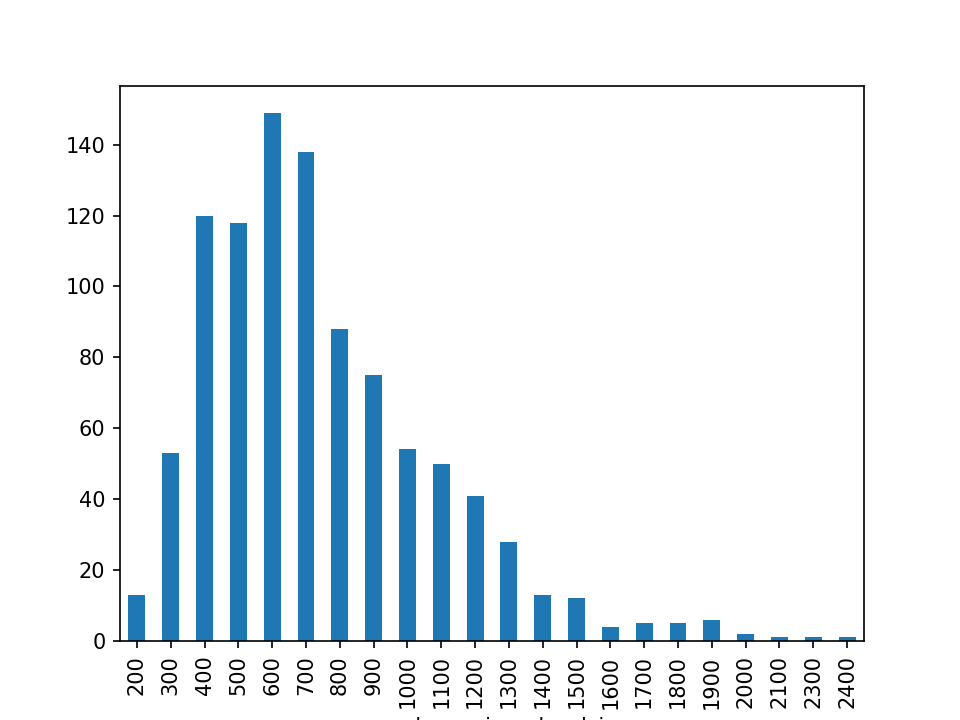

<AxesSubplot:xlabel='zaokrozeni_poslusalci'>

In [32]:
poslusalci_zaokrozeno = round(glasba["poslusalci_tisoc"], -2)
glasba["zaokrozeni_poslusalci"] = poslusalci_zaokrozeno
glasba.groupby("zaokrozeni_poslusalci").size().plot.bar()

<IPython.core.display.Javascript object>


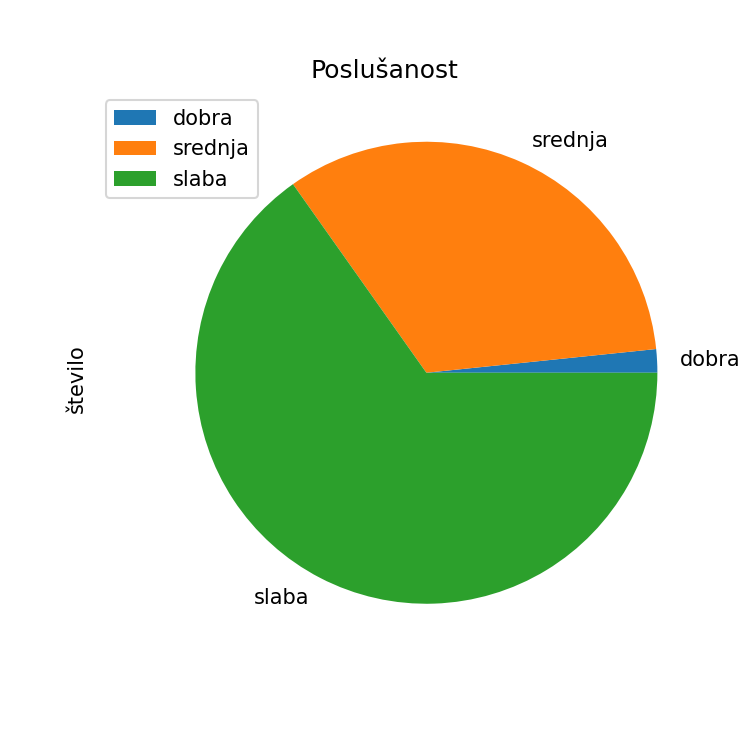

In [33]:
velika_poslusanost = glasba["poslusalci_tisoc"] > 1700
majhna_poslusanost = glasba["poslusalci_tisoc"] < 800
dobro_poslusana_glasba = glasba[velika_poslusanost]
slabo_poslusana_glasba = glasba[majhna_poslusanost]
st_dobro_poslusanih = len(dobro_poslusana_glasba)
st_slabo_poslusanih = len(slabo_poslusana_glasba)
st_srednje_poslusanih = len(glasba) - (st_dobro_poslusanih + st_slabo_poslusanih)
diagram = pd.DataFrame({'število' : [st_dobro_poslusanih, st_srednje_poslusanih, st_slabo_poslusanih]},
                                    index=['dobra', 'srednja', 'slaba'])
plot = diagram.plot(kind='pie', y='število', figsize=(5, 5), title='Poslušanost')

Hipotezo moramo ovržti, saj ima največ glasb nekje med 600K in 700K poslušalcev, kar pa po naših predpostavkah pade v kategorijo slabe poslušanosti. Glasb z več kot 1,7M poslušalci je zelo malo, poglejmo si katere so.

In [34]:
zelo_poslusana = glasba[glasba.poslusalci_tisoc > 1700]
zelo_poslusana[["izvajalec", "naslov", "st_poslusalcev"]]

,izvajalec,naslov,st_poslusalcev
0,Nirvana,Smells Like Teen Spirit,2.4M
1,Oasis,Wonderwall,2M
4,Red Hot Chili Peppers,Californication,1.8M
5,The Killers,Somebody Told Me,1.8M
6,Nirvana,Come as You Are,2.1M
...,...,...,...
37,The Killers,Mr. Brightside,2.3M
40,Radiohead,Karma Police,1.9M
54,Coldplay,Yellow,1.9M
55,Coldplay,The Scientist,1.9M


## Hipoteza 3:
***Največ glasb iz seznama bo po dolžini nekje med 3,5 (210s) in 4,5 (270s) minutah.***

Torej, da bodo glasbe teh dolžin imele večje število poslušalcev.

<IPython.core.display.Javascript object>


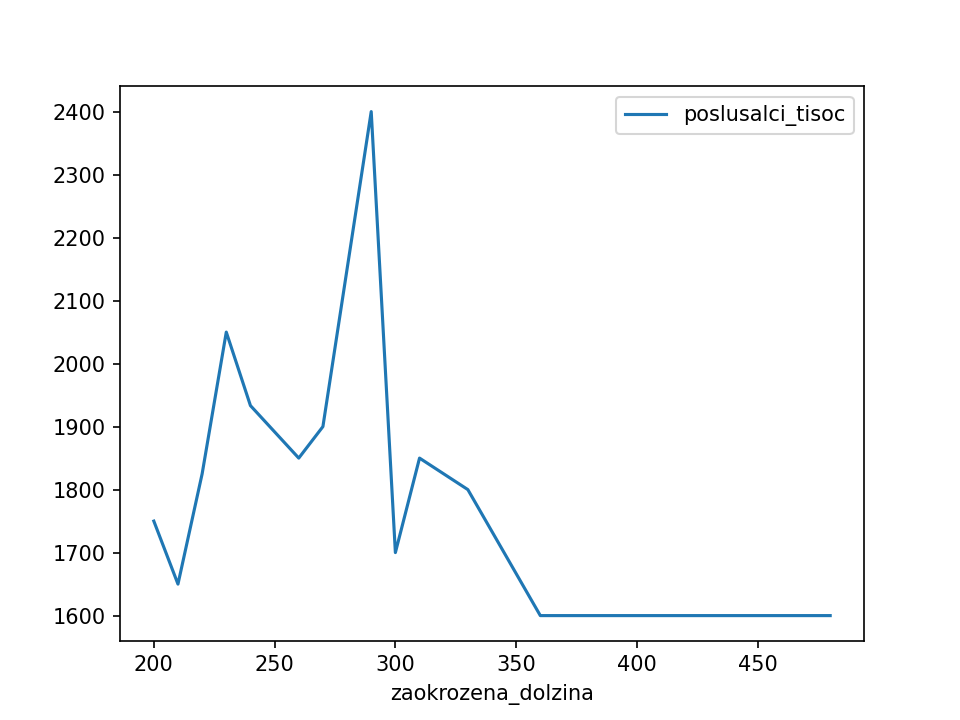

<AxesSubplot:xlabel='zaokrozena_dolzina'>

In [35]:
dolzina_zaokrozenost = round(glasba["dolzina_v_sek"], -1)
glasba["zaokrozena_dolzina"] = dolzina_zaokrozenost
dobra_poslusanost = glasba["poslusalci_tisoc"] > 1500
izbrana = glasba[dobra_poslusanost]
izbrana.groupby("zaokrozena_dolzina").mean()[["poslusalci_tisoc"]].plot()

Hipoteza ni čisto pravilna, graf doseže vrh pri približno 290s kar so 4 minute in 50 sekund. So pa najbolj poslušane glasbe dolžine nekje med 4 in 5 minutah.


## Hipoteza 4 in 5:
***Število poslušalcev neke glasbe in število scrobbles-ov je približno enako.***

***Število poslušalcev in število scrobbles-ov sta linearno odvisna.***

In [36]:
razlika = abs(glasba["scrobbles_tisoc"] - glasba["poslusalci_tisoc"])
glasba["razlika"] = razlika

def podobno_stevilo(razlika):
    return razlika <= 1000

izbrana_glasba = glasba["razlika"].apply(podobno_stevilo)
iskana_glasba = glasba[izbrana_glasba]
iskana_glasba[["izvajalec", "naslov", "st_poslusalcev", "scrobbles"]]

,izvajalec,naslov,st_poslusalcev,scrobbles
488,Bon Jovi,Keep the Faith,249.1K,1.2M
618,Aerosmith,Love in an Elevator,284.1K,1.2M
623,U2,"Hold Me, Thrill Me, Kiss Me, Kill Me",222.4K,1.1M
677,Genesis,I Can&#39;t Dance,300.5K,1.3M
695,U2,Bad,263.6K,1.2M
...,...,...,...,...
895,Theory of a Deadman,Say Goodbye,275.8K,1.1M
937,Ugly Kid Joe,Cats in the Cradle,221K,1M
958,Meat Loaf,I&#39;d Do Anything for Love (But I Won&#39;t ...,170.9K,808.1K
963,U2,The Fly,221.4K,1M


Ta hipoteza je bila čisto napačna. Število predvajanj (scrobbles) bo seveda v večini primerov veliko večja, saj lahko ena oseba večkrat predvaja isto glasbo. Poglejmo si graf obeh podatkov za lažjo predstavo.

<IPython.core.display.Javascript object>


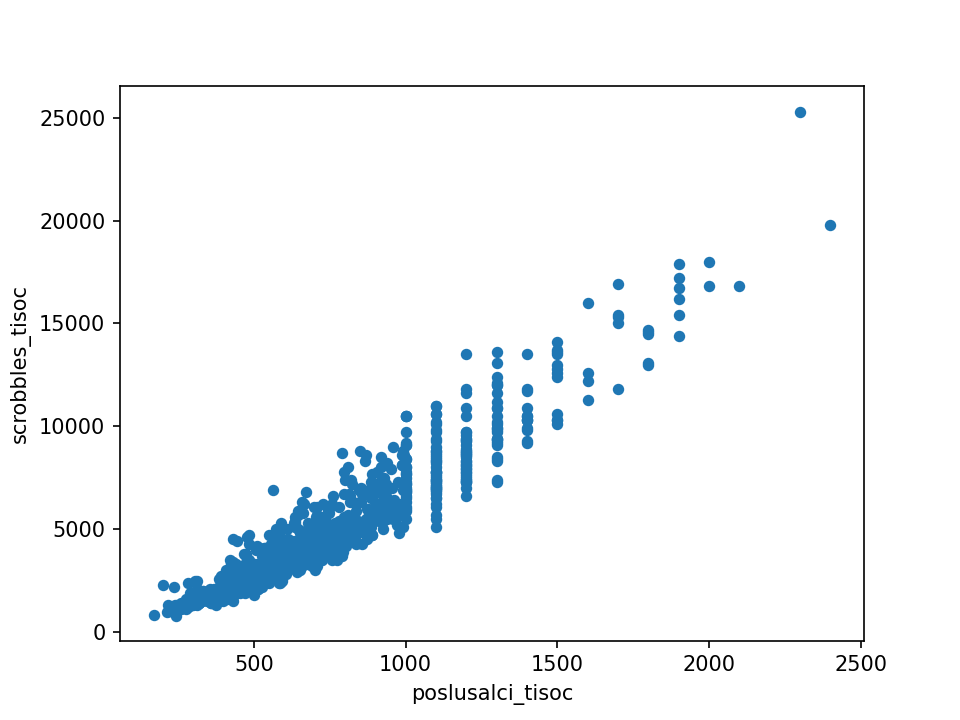

<AxesSubplot:xlabel='poslusalci_tisoc', ylabel='scrobbles_tisoc'>

In [37]:
glasba.plot.scatter('poslusalci_tisoc', 'scrobbles_tisoc')

Graf je skoraj linearen, kar nam pove da se število poslušalcev in število scrobbles-ov linearno povečuje, je pa njuna razlika velika. Scrobbles-ov je približno 10x več kot poslušalcev.

Hipoteza 5 je trdila ravno to, da bosta ta dva podatka linearna odvisna med seboj. Graf sicer ni najlepši, a njegova oblika daleč najbolj spominja na linearno, zato lahko hipotezo 5 potrdimo.

## Hipoteza 6:
***Večina glasb na seznamu bo imela v enem od žanrov besedo rock.***

In [38]:
def ima_besedo(zanr):
    return ("rock" in zanr.split(" "))

glasba_z_besedo_rock1 = glasba["prvi_zanr"].apply(ima_besedo)
glasba_z_besedo_rock2 = glasba["drugi_zanr"].apply(ima_besedo)
glasba_z_besedo_rock3 = glasba["tretji_zanr"].apply(ima_besedo)
glasba_z_besedo_rock = glasba[glasba_z_besedo_rock1 | glasba_z_besedo_rock2 | glasba_z_besedo_rock3]
glasba_z_besedo_rock[["izvajalec", "naslov", "prvi_zanr", "drugi_zanr", "tretji_zanr"]]

,izvajalec,naslov,prvi_zanr,drugi_zanr,tretji_zanr
0,Nirvana,Smells Like Teen Spirit,grunge,rock,alternative
1,Oasis,Wonderwall,britpop,rock,90s
2,The Cranberries,Zombie,rock,alternative,90s
3,Led Zeppelin,Stairway to Heaven,classic rock,rock,70s
4,Red Hot Chili Peppers,Californication,rock,alternative rock,alternative
...,...,...,...,...,...
972,Elvis Presley,Jailhouse Rock,rock n roll,classic rock,oldies
973,The Beatles,Penny Lane,classic rock,60s,rock
974,INXS,New Sensation,80s,rock,pop
975,Alanis Morissette,Hands Clean,female vocalists,rock,alternative


Skoraj vse glasbe imajo v enem od žanrov besedo rock. Od 977 jih ima besedo rock kar 946. Poglejmo katere glasbe pa v žanru nimajo besede rock in kakšni so njihovi žanri.

In [39]:
def nima_besede(zanr):
    return ("rock" not in zanr.split(" "))

glasba_brez_rock1 = glasba["prvi_zanr"].apply(nima_besede)
glasba_brez_rock2 = glasba["drugi_zanr"].apply(nima_besede)
glasba_brez_rock3 = glasba["tretji_zanr"].apply(nima_besede)
glasba_brez_rock = glasba[glasba_brez_rock1 & glasba_brez_rock2 & glasba_brez_rock3]
glasba_brez_rock[["izvajalec", "naslov", "prvi_zanr", "drugi_zanr", "tretji_zanr"]]

,izvajalec,naslov,prvi_zanr,drugi_zanr,tretji_zanr
138,The Verve,Bitter Sweet Symphony,britpop,90s,alternative
200,Keane,Somewhere Only We Know,britpop,indie,alternative
225,Metallica,Enter Sandman,metal,heavy metal,thrash metal
305,The Cure,Friday I&#39;m in Love,new wave,80s,alternative
327,The Cure,Boys Don&#39;t Cry,80s,new wave,post-punk
...,...,...,...,...,...
793,James Blunt,You&#39;re Beautiful,pop,james blunt,love
812,Metallica,Fade to Black,thrash metal,metal,heavy metal
823,Simple Minds,Don&#39;t You (Forget About Me),80s,new wave,pop
908,Kelly Clarkson,Since U Been Gone,pop,female vocalists,kelly clarkson


Opazimo, da gre večinoma za metal, pop ali punk glasbo.

## Hipoteza 7:
***Večina alternativne glasbe ima ljubezensko tematiko.***

Ker je pobranega besedila zelo malo in je težko ugotoviti temo o kateri govori, bodo rezultati verjetno dokaj nepravilni. Predpostavimo, da bodo v besedilu z ljubezensko tematiko besede kot so "feel", "think", "love", "touch", "care" ali "sorry".

In [40]:
def ima_alternative(zanr):
    return ("alternative" in zanr.split(" "))

glasba_alternative1 = glasba["prvi_zanr"].apply(ima_alternative)
glasba_alternative2 = glasba["drugi_zanr"].apply(ima_alternative)
glasba_alternative3 = glasba["tretji_zanr"].apply(ima_alternative)
alternative_glasba = glasba[glasba_alternative1 | glasba_alternative2 | glasba_alternative3]
len(alternative_glasba)

368

In [41]:
def je_ljubezenska(besedilo):
    return (("feel" or "think" or "love" or "touch" or "care" or "sorry") in besedilo.lower().split(" "))

ljubezenska = alternative_glasba["besedilo"].apply(je_ljubezenska)
glasba_ljubezenska = alternative_glasba[ljubezenska]
len(glasba_ljubezenska)

10

Le 10 glasb od 368 je imelo v besedilu te besede, zato hipotezo ovržemo. 

## Zaključek:
Takoj ko odpremo spletno stran iz katere sem pobrala podatke, na vrhu opazimo izvajalce in naslove glasb, ki jih poznamo. Gre za glasbo, ki jo bomo verjetno še dolgo poslušali in ne glede na nove glasbene zvrsti, ostaja popularna. Nekatere ugotovitve so bile pričakovane. Verjetno zna vsak našteti vsaj 5 znanih rock glasb iste skupine, zato ni presenetljivo da se nekatere ponovijo več kot dvajsetkrat. Tudi to da se v žanrih pojavi beseda rock in da sta število poslušalcev in število scrobbles-ov linearno odvisna nas ne preseneti. Zanimivo je, da ljubezenska tematika ni bila tako pogosta. Moramo pa upoštevati, da za raziskavo tematike nisem imela dobrih pogojev, zato bi se tu dalo narediti še nadaljno analizo, če si želimo bolj točnih rezultatov.